In [19]:
import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
(x_train, y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [7]:
print(f"x train shape {x_train.shape}\nx test shape {x_test.shape}")

x train shape (60000, 28, 28)
x test shape (10000, 28, 28)


In [21]:
x_train_n = x_train/255
x_test_n = x_test/255

In [23]:
model = Sequential()

model.add(Conv2D(16,(5,5),activation='relu',input_shape=(28,28,1))) # 24x24x16
model.add(BatchNormalization())
model.add(MaxPool2D(2,2)) # 12x12x16
model.add(Dropout(0.2))

model.add(Conv2D(32,(5,5),activation='relu')) # 8x8x32
model.add(BatchNormalization())
model.add(MaxPool2D(2,2)) # 4x4x32
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          12832     
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 32)         1

In [25]:
stopping = EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=3)

modelcheck = ModelCheckpoint('checkpoints/_{epoch}.ckpt',
                            monitor='val_loss',
                            save_best_only=True)

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
model.fit(x_train,y_train,callbacks=(stopping,modelcheck),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 16s 5ms/step - loss: 0.4683 - accuracy: 0.8280
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3387 - accuracy: 0.8739
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3041 - accuracy: 0.8881
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2828 - accuracy: 0.8942
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2683 - accuracy: 0.8995
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2552 - accuracy: 0.9053
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2423 - accuracy: 0.9087
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2373 - accuracy: 0.9119
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2266 - accuracy: 0.9146
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - l

In [37]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2504 - accuracy: 0.9146


[0.25041815638542175, 0.9146000146865845]

In [75]:
x_test[0].shape

(28, 28)

In [73]:
model.predict(np.expand_dims(x_test[0],0))

1/1 [==============================] - 0s 26ms/step


array([[9.7387601e-07, 8.2337378e-05, 3.7338211e-08, 3.7110940e-08,
        1.4645654e-07, 1.2964995e-01, 6.8040839e-07, 9.8207814e-01,
        2.9654300e-05, 9.9999988e-01]], dtype=float32)

Save model

In [62]:
model.save("model.h5")

In [64]:
model.save('model',save_format='tf')

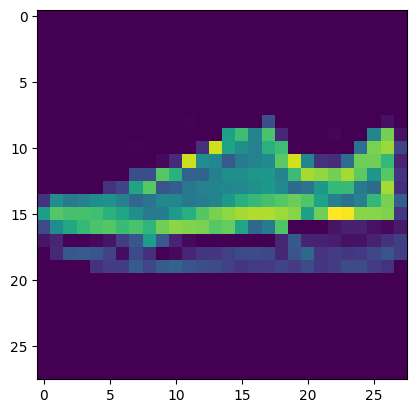

In [107]:
plt.imshow(x_test[9])

In [66]:
import cv2

In [86]:
np.argmax(model.predict(np.expand_dims(png,0)))

1/1 [==============================] - 0s 36ms/step


2

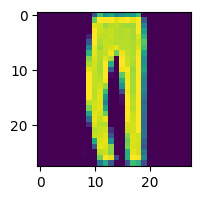

In [90]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[2])

In [ ]:
png = cv2.imread('red-plain-t-shirt.png',cv2.IMREAD_GRAYSCALE)
png = cv2.resize(png,(28,28),interpolation=cv2.INTER_AREA)
plt.imshow(png)

In [3]:
label = {
                0:'T-shirt/top',
                1:'Trouser',
                2:'Pullover',
                3:'Dress',
                4:'Coat',
                5:'Sandal',
                6:'Shirt',
                7:'Sneaker',
                8:'Bag',
                9:'Ankle boot'
    }
label[2]

AttributeError: 'str' object has no attribute 'value'